In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_datareader
import datetime
import pandas_datareader as web
import pprint

In [3]:
start = datetime.datetime(2012,1,1)
end   = datetime.datetime(2017,1,1)
tesla_df = web.DataReader('TSLA', 'stooq', start, end)  # GOOGLE API DOES NOT WORK
ford_df = web.DataReader('F', 'stooq', start, end)  # GOOGLE API DOES NOT WORK
gm_df = web.DataReader('GM', 'stooq', start, end)  # GOOGLE API DOES NOT WORK
print("----------------- TESLA DATA")
pprint.pprint(tesla_df.tail(10))
print("----------------- FORD DATA")
pprint.pprint(ford_df.tail(10))
print("----------------- GM DATA")
pprint.pprint(gm_df.tail(10))


----------------- TESLA DATA
               Open     High      Low    Close    Volume
Date                                                    
2012-01-17  1.77733  1.82267  1.76067  1.77333  69770865
2012-01-13  1.89667  1.90000  1.50933  1.51933  82544295
2012-01-12  1.88467  1.90800  1.85400  1.88333  10939500
2012-01-11  1.84133  1.89200  1.82000  1.88200  10083585
2012-01-10  1.82933  1.85067  1.81667  1.84133  10075980
2012-01-09  1.80000  1.83267  1.74133  1.81667  13454265
2012-01-06  1.81667  1.85267  1.76067  1.79400  14794305
2012-01-05  1.85067  1.86200  1.79000  1.80800  15081480
2012-01-04  1.88067  1.91133  1.83333  1.84733   9246990
2012-01-03  1.92933  1.96667  1.84333  1.87200  13920780
----------------- FORD DATA
               Open     High      Low    Close        Volume
Date                                                        
2012-01-17  7.18795  7.22384  7.04659  7.08212  7.532042e+07
2012-01-13  7.07036  7.11694  6.97559  7.09239  7.870282e+07
2012-01-12  7.1

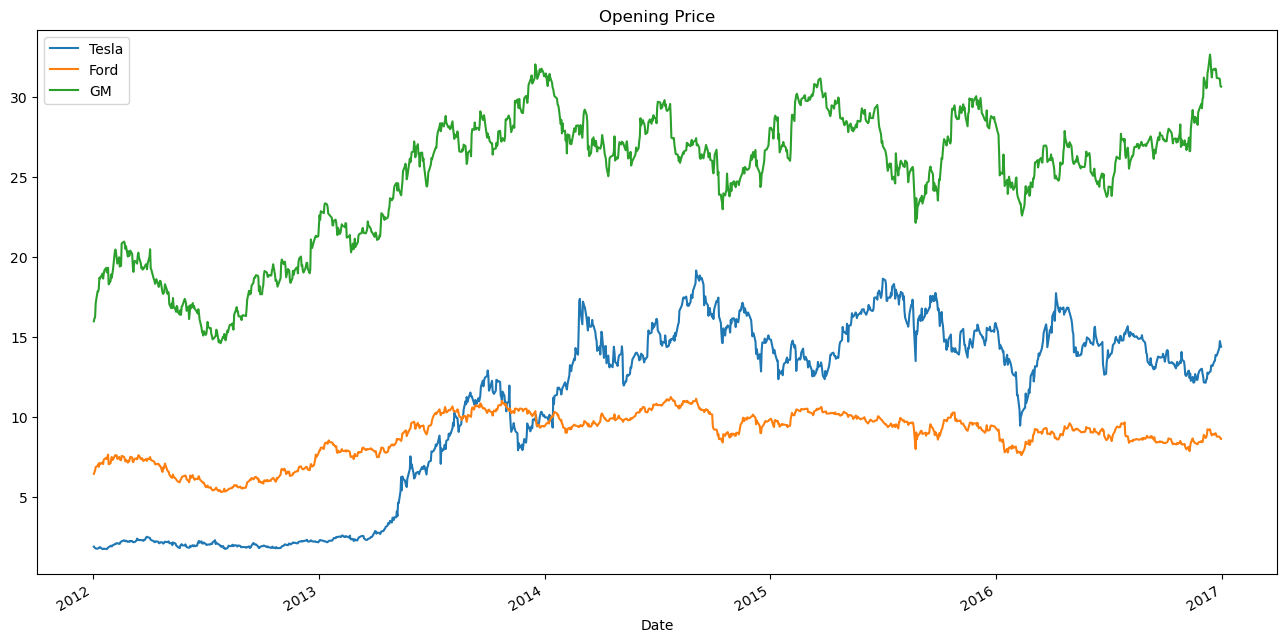

In [4]:
tesla_df['Open'].plot(figsize=(16,8), label='Tesla', title="Opening Price")
ford_df['Open'].plot(label='Ford')
gm_df['Open'].plot(label='GM')
plt.legend();

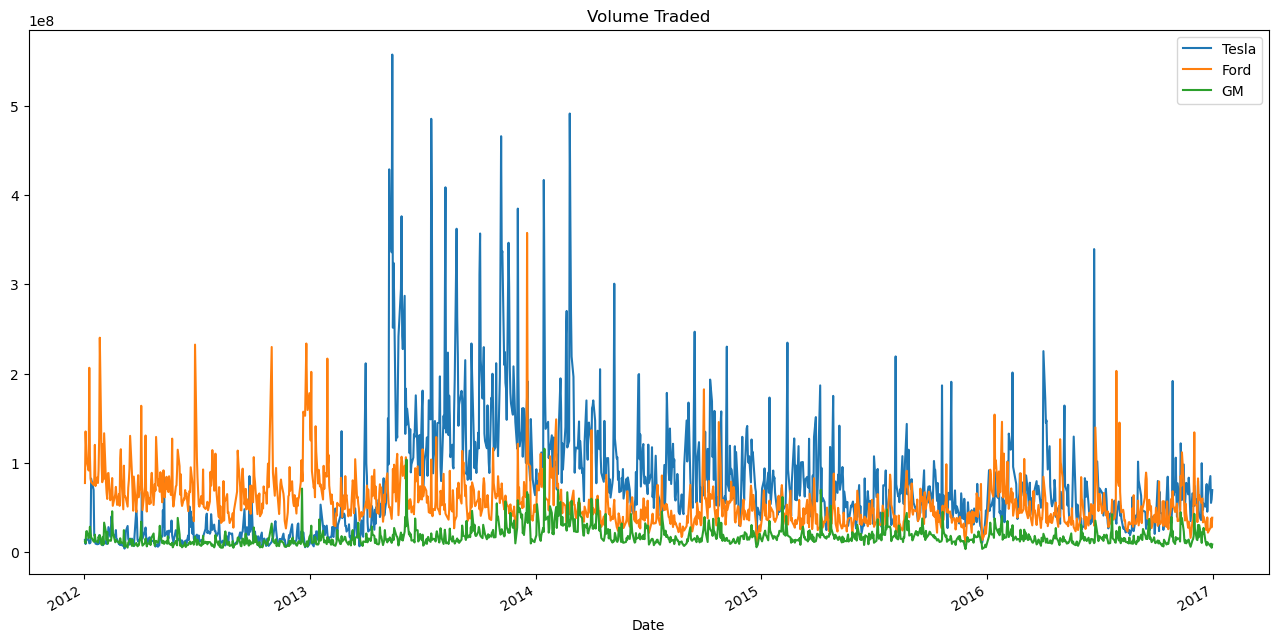

In [15]:
tesla_df['Volume'].plot(figsize=(16,8) , label='Tesla', title="Volume Traded")
ford_df['Volume'].plot(label='Ford' )
gm_df['Volume'].plot(label='GM' )
plt.legend();

In [25]:
#
# Find the value(time) where we got the max value
date = ford_df.index[ford_df['Volume'].argmax()]
print(f"The max volume for Ford was {ford_df['Volume'].max()} in {date}")
print("------")
date = tesla_df.index[tesla_df['Volume'].argmax()]
print(f"The max volume for Tesla was {tesla_df['Volume'].max()} in {date}")
print("------")
date = gm_df.index[gm_df['Volume'].argmax()]
print(f"The max volume for GM was {gm_df['Volume'].max()} in {date}")
print("------")


The max volume for Ford was 357561831.5527 in 2013-12-18 00:00:00
------
The max volume for Tesla was 557248410 in 2013-05-14 00:00:00
------
The max volume for GM was 115948374.12854 in 2014-01-15 00:00:00
------


<Axes: xlabel='Date'>

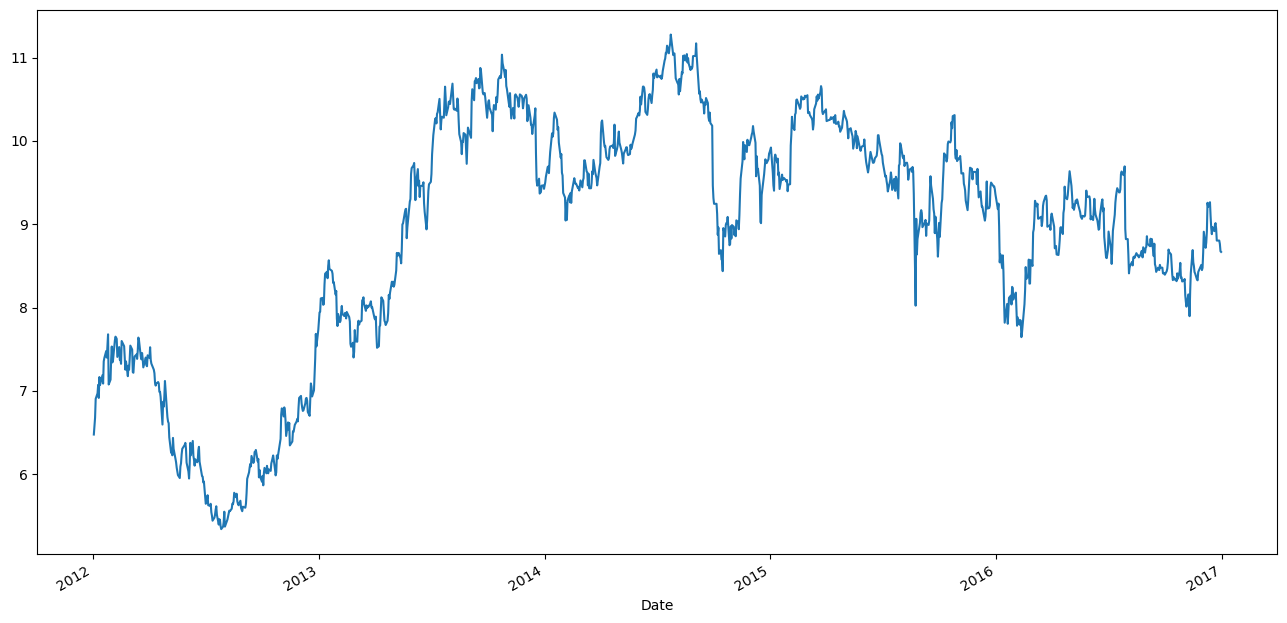

In [27]:
ford_df['Open'].plot(label='Ford', figsize=(16,8))

In [41]:
tesla_df['Total Traded'] = tesla_df['Open'] * tesla_df['Volume']
ford_df['Total Traded'] = ford_df['Open'] * ford_df['Volume']
gm_df['Total Traded'] = gm_df['Open'] * gm_df['Volume']
# 
# added wrong column before (had a typo) so removing it now..
# ford_df.drop('Total Trade', axis='columns', inplace=True)
# gm_df.drop('Total Trade', axis='columns', inplace=True)
# tesla_df.drop('Total Trade', axis='columns', inplace=True)
#
# can only remove the columns if they are there otherwise you get an exception!

In [37]:
ford_df.head(10)

,Open,High,Low,Close,Volume,Total Traded
Date,,,,,,
2016-12-30,8.66712,8.69805,8.55395,8.59021,3.869393e+07,3.353650e+08
2016-12-29,8.67508,8.71662,8.65296,8.66006,2.796503e+07,2.425988e+08
2016-12-28,8.76259,8.81830,8.65296,8.67508,3.771967e+07,3.305220e+08
2016-12-27,8.80326,8.85895,8.75552,8.77231,2.740846e+07,2.412838e+08
2016-12-23,8.80326,8.82271,8.75552,8.82271,2.200639e+07,1.937279e+08
2016-12-22,8.94383,8.95087,8.77940,8.77940,3.898111e+07,3.486404e+08
2016-12-21,9.01276,9.04372,8.95087,8.95087,2.550457e+07,2.298666e+08
2016-12-20,8.99328,9.07908,8.97919,9.05076,2.509926e+07,2.257247e+08
2016-12-19,8.91641,9.06140,8.91641,8.96507,3.223662e+07,2.874349e+08


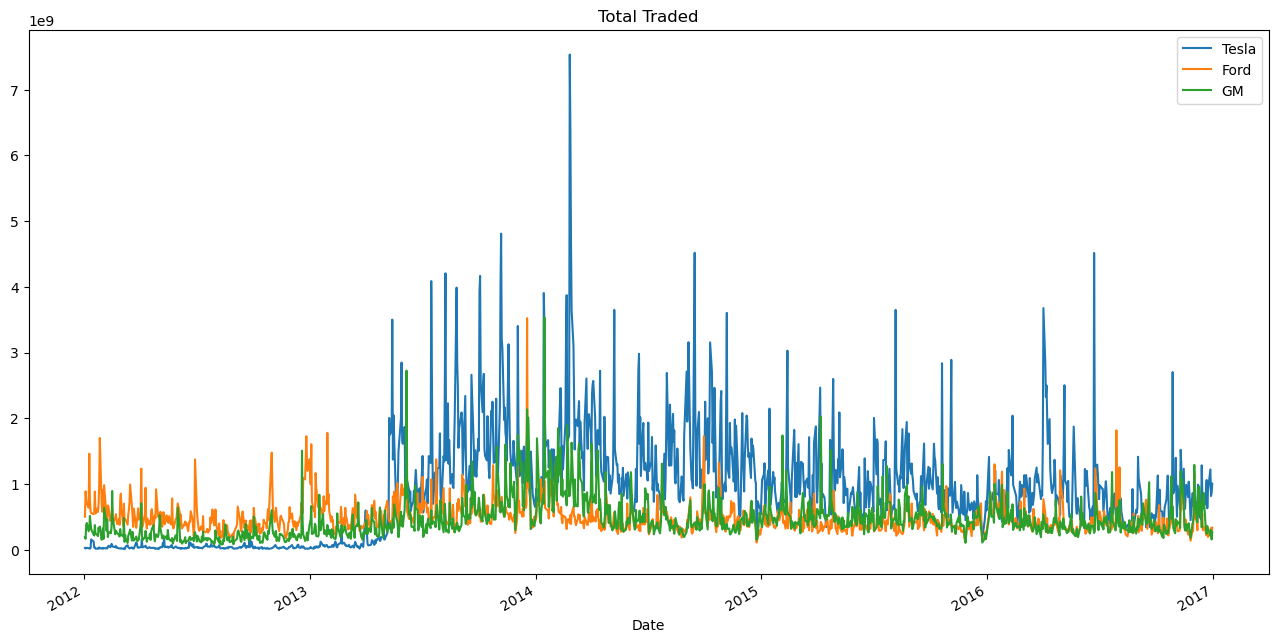

In [43]:
tesla_df['Total Traded'].plot(figsize=(16,8) , label='Tesla', title="Total Traded")
ford_df['Total Traded'].plot(label='Ford' )
gm_df['Total Traded'].plot(label='GM' )
plt.legend();

In [46]:
tesla_df.index[tesla_df['Total Traded'].argmax()]

Timestamp('2014-02-25 00:00:00')

In [47]:
#
#

In [48]:
#
#
#

In [50]:
#
###############
#
#  MOVING AVERAGES
#
###############
#

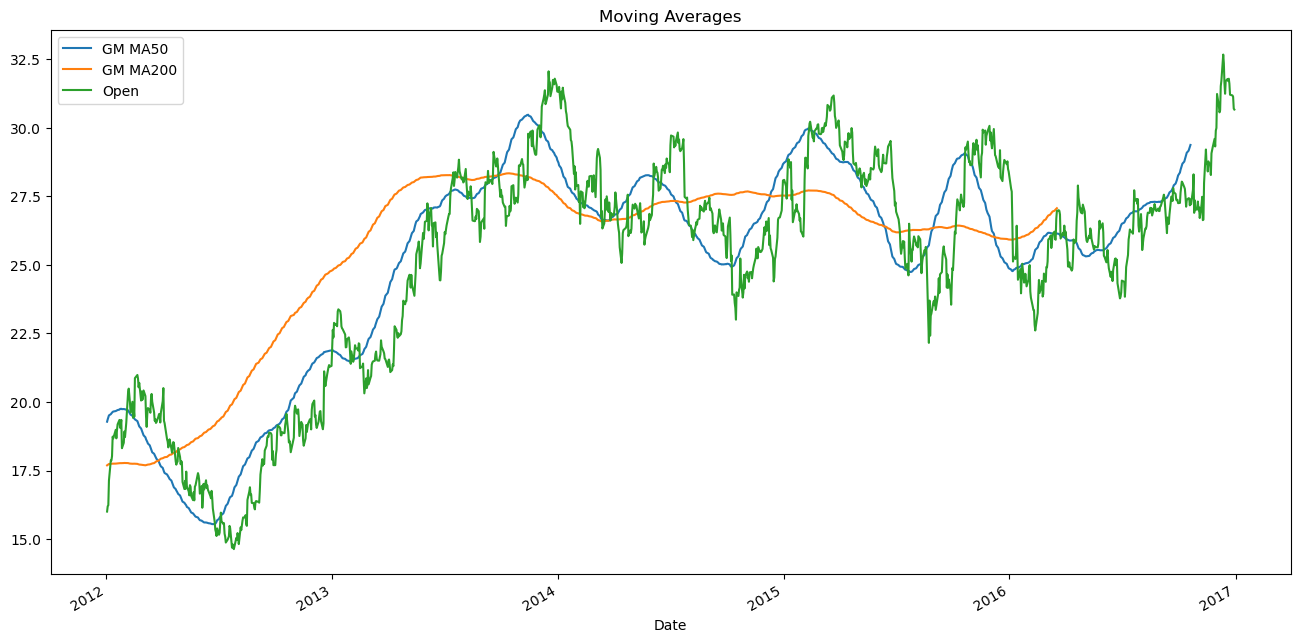

In [53]:
gm_df['MA50'] = gm_df['Open'].rolling(50).mean()
gm_df['MA200'] = gm_df['Open'].rolling(200).mean()
gm_df['MA50'].plot(figsize=(16,8), title='Moving Averages', label='GM MA50')
gm_df['MA200'].plot(label='GM MA200')
gm_df['Open'].plot(label='Open')
plt.legend();


<Axes: xlabel='Date'>

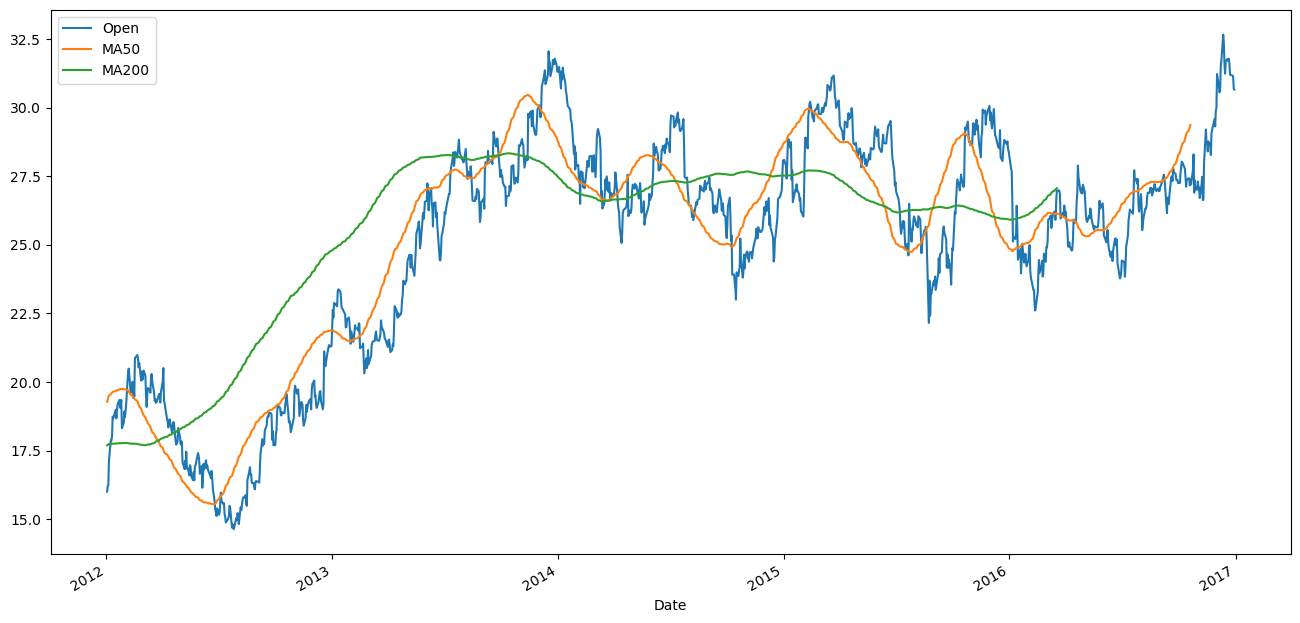

In [56]:
#
# same as above but with single command toplot
gm_df[['Open','MA50','MA200']].plot(figsize=(16,8))

In [57]:
#
#
#

In [59]:
#
###############
#
#  CORRELATIONS
#
###############
#

In [60]:
#
#
#
from pandas.plotting import scatter_matrix

In [63]:

#
# we need to put together the columns ('Open') from the 3 dataframe
# first parameter is a list of columns 
# second parameter is how to concatenate them
cars_df = pd.concat([tesla_df['Open'], ford_df['Open'], gm_df['Open']], axis=1)
cars_df.head(5)

,Open,Open,Open
Date,,,
2016-12-30,14.4200,8.66712,30.6586
2016-12-29,14.5707,8.67508,30.6935
2016-12-28,14.7687,8.76259,31.1216
2016-12-27,14.3253,8.80326,31.1724
2016-12-23,13.8667,8.80326,31.1992


In [66]:
# NEed to reset the column names
cars_df.columns = ['Tesla Open', 'Ford Open', 'GM Open']
cars_df.head(5)

,Tesla Open,Ford Open,GM Open
Date,,,
2016-12-30,14.4200,8.66712,30.6586
2016-12-29,14.5707,8.67508,30.6935
2016-12-28,14.7687,8.76259,31.1216
2016-12-27,14.3253,8.80326,31.1724
2016-12-23,13.8667,8.80326,31.1992


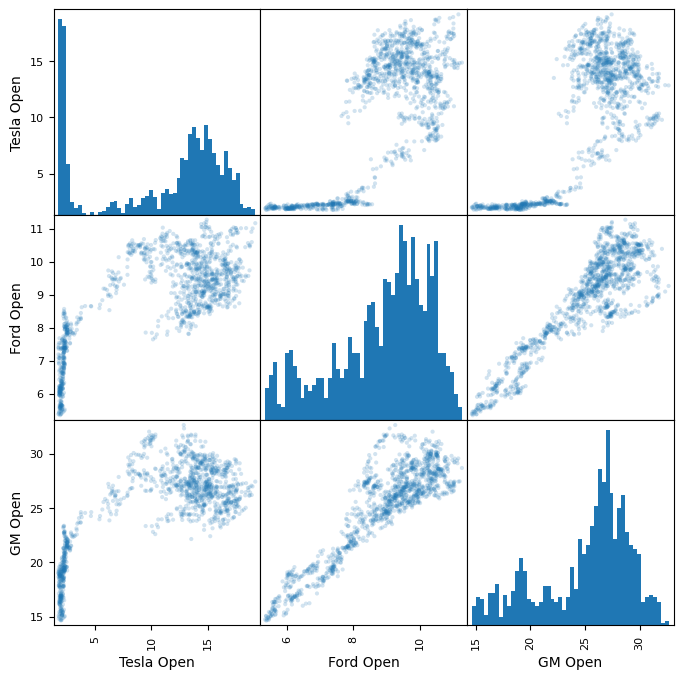

In [70]:
#
# alpha controls the color density (i.e. darker where there are more points)
# hist_kwds is a dictionary (need to check documentations for the actual keywords
scatter_matrix(cars_df, figsize=(8,8), alpha = 0.2, hist_kwds= { 'bins': 50} );

In [71]:
#
#
#
#

In [72]:
#
#
#
#

In [73]:
#
#
############################# PART 2 (CANDLE STICK CHART)
#
#

In [108]:
import mplfinance as mpf
#from matplotlib.dates import date2num
#mpf.plot(df, type=”candle”, title=f”Candlestick Chart for {symbol}”, ylabel=”Price”, style=”yahoo”)

In [83]:
#
# we take the index and put it back as a column (sme Data type: datetime)
ford_reset = ford_df.loc['2012-01'].reset_index()
pprint.pprint(ford_reset.head(5))
ford_reset.info()

        Date     Open     High      Low    Close        Volume  Total Traded
0 2012-01-31  7.37987  7.40250  7.21861  7.34883  7.845932e+07  5.790196e+08
1 2012-01-30  7.13401  7.35963  7.09973  7.27105  9.759822e+07  6.962666e+08
2 2012-01-27  7.07611  7.41266  6.97559  7.22384  2.402438e+08  1.699991e+09
3 2012-01-26  7.67814  7.69104  7.46067  7.53571  1.278774e+08  9.818604e+08
4 2012-01-25  7.53571  7.65011  7.48373  7.61890  9.161847e+07  6.904102e+08
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          20 non-null     datetime64[ns]
 1   Open          20 non-null     float64       
 2   High          20 non-null     float64       
 3   Low           20 non-null     float64       
 4   Close         20 non-null     float64       
 5   Volume        20 non-null     float64       
 6   Total Traded  20 non-null     f

In [86]:
#
# we want the Date field into a numeric value
ford_reset['date_ax'] = ford_reset['Date'].apply(lambda x: date2num(x))
ford_reset.head(5)

,Date,Open,High,Low,Close,Volume,Total Traded,date_ax
0,2012-01-31,7.37987,7.40250,7.21861,7.34883,7.845932e+07,5.790196e+08,15370.0
1,2012-01-30,7.13401,7.35963,7.09973,7.27105,9.759822e+07,6.962666e+08,15369.0
2,2012-01-27,7.07611,7.41266,6.97559,7.22384,2.402438e+08,1.699991e+09,15366.0
3,2012-01-26,7.67814,7.69104,7.46067,7.53571,1.278774e+08,9.818604e+08,15365.0
4,2012-01-25,7.53571,7.65011,7.48373,7.61890,9.161847e+07,6.904102e+08,15364.0


In [109]:
# Order of columns in important here
#list_of_columns = ['date_ax', 'Open', 'High', 'Low', 'Close']
#ford_values = [ tuple(vals) for vals in ford_reset[list_of_columns].values ]
#ford_values[:2]

In [111]:
#
# Testing with yfinance.. Video is too old to be followed
# Note yfinance as source of data!!!
#
import yfinance as yf
from datetime import timedelta

end_date = datetime.datetime(year=2025, month=3, day=1)
start_date = end_date - timedelta(days=60)

# set the name of the ticker we want to download market data for
ticker = "AAPL"


# download market data
df = yf.download(
    tickers=ticker,
    start=start_date,
    end=end_date,
    interval="1d",
    group_by="ticker",
    auto_adjust=True,
    progress=False
)


In [112]:
pprint.pprint(df.head())
df.info()

Ticker            AAPL                                              
Price             Open        High         Low       Close    Volume
Date                                                                
2024-12-31  251.303405  252.139619  248.306948  249.292496  39480700
2025-01-02  247.809220  247.978468  240.731247  242.752106  55740700
2025-01-03  242.264297  243.080598  240.800915  242.264297  40244100
2025-01-06  243.210031  246.216438  242.105028  243.896927  45045600
2025-01-07  241.885999  244.444435  240.263348  241.119476  40856000
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 40 entries, 2024-12-31 to 2025-02-28
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (AAPL, Open)    40 non-null     float64
 1   (AAPL, High)    40 non-null     float64
 2   (AAPL, Low)     40 non-null     float64
 3   (AAPL, Close)   40 non-null     float64
 4   (AAPL, Volume)  40 non-null     int64  
dtypes: flo

In [113]:
# restructure the default multi-index dataframe to our preferred format
#  This cell can only be run once.. it moves the ticket level AAPL from the first line to the side
#  
df = df.stack(level="Ticker", future_stack=True)
df.index.names = ["Date", "Symbol"]
df = df[["Open", "High", "Low", "Close", "Volume"]]
df = df.swaplevel(0, 1)
df = df.sort_index()
pprint.pprint(df.head())
df.info()

Price                    Open        High         Low       Close    Volume
Symbol Date                                                                
AAPL   2024-12-31  251.303405  252.139619  248.306948  249.292496  39480700
       2025-01-02  247.809220  247.978468  240.731247  242.752106  55740700
       2025-01-03  242.264297  243.080598  240.800915  242.264297  40244100
       2025-01-06  243.210031  246.216438  242.105028  243.896927  45045600
       2025-01-07  241.885999  244.444435  240.263348  241.119476  40856000
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 40 entries, ('AAPL', Timestamp('2024-12-31 00:00:00')) to ('AAPL', Timestamp('2025-02-28 00:00:00'))
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    40 non-null     float64
 1   High    40 non-null     float64
 2   Low     40 non-null     float64
 3   Close   40 non-null     float64
 4   Volume  40 non-null     int64  
dtypes: float64(4), int64(

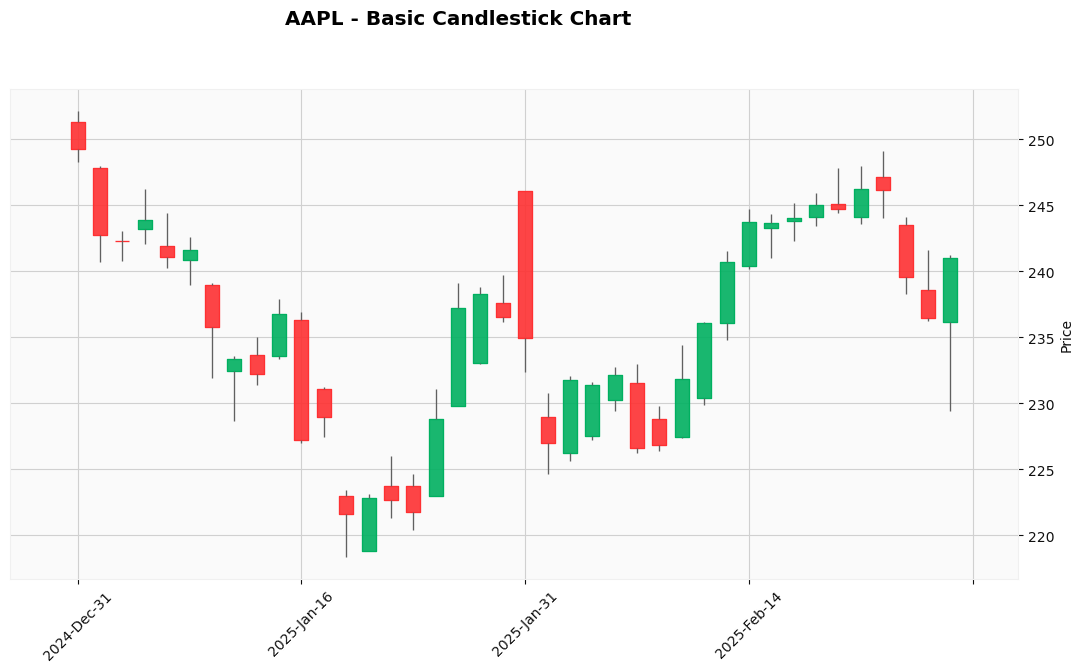

In [114]:
mpf.plot(
    df.xs(ticker),
    type="candle",
    style="yahoo",
    figsize=(14, 7),
    title=f"{ticker} - Basic Candlestick Chart"
)